In [1]:
import json
def load_normal_json(filepath:str):
    with open(filepath, 'r') as reader:
        json_obj = json.load(reader)
    return json_obj

In [2]:
jsonFileOne = load_normal_json("./output_tests/delta_times_in_relation_to_time_one_lifts_2000_orders.json")


jsonFileTwo = load_normal_json("./output_tests/delta_times_in_relation_to_time_two_lifts_2000_orders.json")

In [3]:
all_times =[]
all_deltas = []
all_kinds = []


def append_to_big_arrays(json_file, kind: str):
    local_all_times = []
    local_all_deltas = []
    local_all_kinds = []
    for entry in json_file['timing_values']:
        max_time = max(entry['times'])
        percentaged_times = []
        for t in entry['times']:
            percentaged_times.append((t / max_time) * 100)
            local_all_kinds.append(kind)
        local_all_times += percentaged_times
        local_all_deltas += entry['deltas']
    return (local_all_times, local_all_deltas, local_all_kinds)


In [4]:
tupleJsonFileOne = append_to_big_arrays(jsonFileOne, 'oneLift')
tupleJsonFileTwo = append_to_big_arrays(jsonFileTwo, 'twoLift')
all_times += tupleJsonFileOne[0]
all_deltas += tupleJsonFileOne[1]
all_kinds += tupleJsonFileOne[2]

all_times += tupleJsonFileTwo[0]
all_deltas += tupleJsonFileTwo[1]
all_kinds += tupleJsonFileTwo[2]

In [5]:
import pandas as pd
df = pd.DataFrame({
    "time": all_times,
    "delta": all_deltas,
    "kind": all_kinds
})
df

,time,delta,kind
0,0.069387,20.623126,oneLift
1,0.111493,23.102222,oneLift
2,0.165857,29.827373,oneLift
3,0.205515,21.759250,oneLift
4,0.251387,25.168121,oneLift
...,...,...,...
19240831,99.678146,41.915007,twoLift
19240832,99.763785,38.679133,twoLift
19240833,99.846849,37.516564,twoLift
19240834,99.922847,34.324980,twoLift


In [16]:
df['binned_time'] = pd.cut(df['time'], bins=20).apply(lambda interval: f"({interval.left:.2f}, {interval.right:.2f}]")
df

,time,delta,kind,binned_time
0,0.069387,20.623126,oneLift,"(-0.08, 5.02]"
1,0.111493,23.102222,oneLift,"(-0.08, 5.02]"
2,0.165857,29.827373,oneLift,"(-0.08, 5.02]"
3,0.205515,21.759250,oneLift,"(-0.08, 5.02]"
4,0.251387,25.168121,oneLift,"(-0.08, 5.02]"
...,...,...,...,...
19240831,99.678146,41.915007,twoLift,"(95.00, 100.00]"
19240832,99.763785,38.679133,twoLift,"(95.00, 100.00]"
19240833,99.846849,37.516564,twoLift,"(95.00, 100.00]"
19240834,99.922847,34.324980,twoLift,"(95.00, 100.00]"


In [17]:
df[df['kind'] == 'twoLift'][['delta', 'binned_time']].groupby("binned_time").count()

C:\Users\robbe\AppData\Local\Temp\ipykernel_47500\2346103808.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['kind'] == 'twoLift'][['delta', 'binned_time']].groupby("binned_time").count()


,delta
binned_time,
"(-0.08, 5.02]",479968
"(5.02, 10.02]",484821
"(10.02, 15.02]",485217
"(15.02, 20.02]",491106
"(20.02, 25.02]",477696
"(25.02, 30.02]",476866
"(30.02, 35.01]",479571
"(35.01, 40.01]",479622
"(40.01, 45.01]",493730


C:\Users\robbe\Documents\GitHub\SoftwareSim\.venv\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


Text(0, 0.5, 'Real time percentage bins')

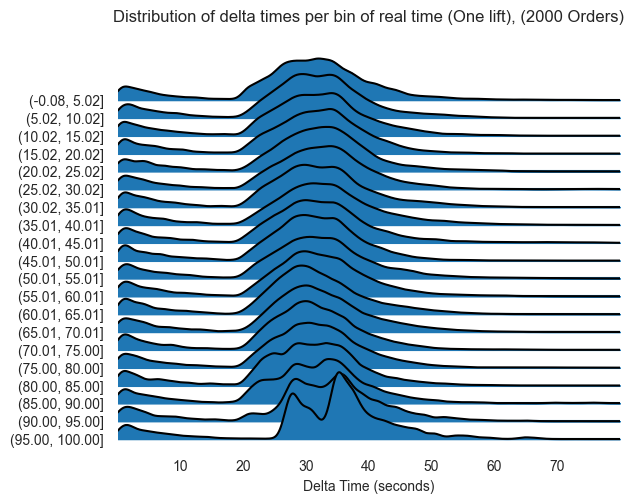

In [18]:
# https://github.com/leotac/joypy/blob/master/Joyplot.ipynb
tempDf = df[df['kind'] == 'oneLift'][['delta', 'binned_time']]
from joypy import joyplot
from matplotlib import pyplot as plt
joyplot(
    data=tempDf,
    by="binned_time",
    column="delta",
    x_range=[0, 80],
)
plt.title(f"Distribution of delta times per bin of real time (One lift), (2000 Orders)")
plt.xlabel("Delta Time (seconds)")
plt.ylabel("Real time percentage bins")

C:\Users\robbe\Documents\GitHub\SoftwareSim\.venv\Lib\site-packages\joypy\joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


Text(0, 0.5, 'Real time percentage bins')

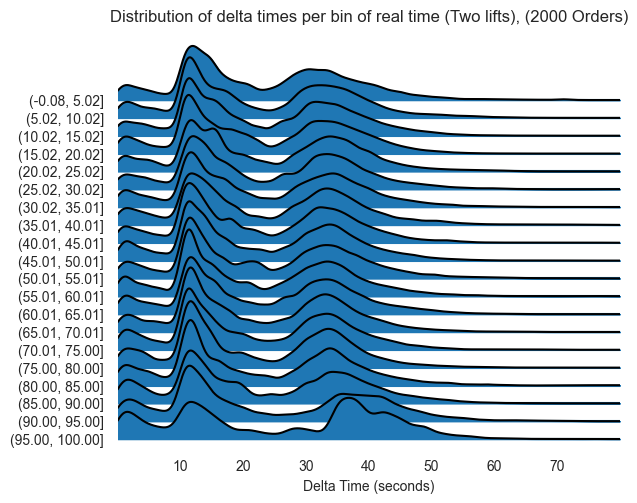

In [11]:
joyplot(
    data=df[df['kind'] == 'twoLift'][['delta', 'binned_time']],
    by="binned_time",
    column="delta",
    x_range=[0, 80]
)
plt.title(f"Distribution of delta times per bin of real time (Two lifts), (2000 Orders)")
plt.xlabel("Delta Time (seconds)")
plt.ylabel("Real time percentage bins")